In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
import math as math
import seaborn as sns
from matplotlib.colors import LogNorm
%pylab inline

!pip install sociophysicsdatahandler

Populating the interactive namespace from numpy and matplotlib
  Created wheel for sociophysicsdatahandler: filename=sociophysicsDataHandler-1.2.2-py3-none-any.whl size=7126 sha256=813eb9a597180a0955cfa29d932a640511986a77ab4a519ba7df65b5fc7e54ad
  Stored in directory: /root/.cache/pip/wheels/b8/e3/2f/e46bb2cfe43423220379ae42e6d52e407b282aac2a84bcad40
  Created wheel for pyocclient: filename=pyocclient-0.6-py3-none-any.whl size=26056 sha256=a3b96db879e5b8997d869f818752a5060b1af391c810a5a464bc6a704d08ab9a
  Stored in directory: /root/.cache/pip/wheels/fd/4b/94/c7ed8749c157aeef88f1a23dfe0709c3b64b5ec36964d3d15f
Successfully built sociophysicsdatahandler pyocclient


In [4]:
from sociophysicsDataHandler import SociophysicsDataHandler
!cat auth.txt

guest
WVSWV-INLZY-VBPAU-IWMOR

In [ ]:
dh = SociophysicsDataHandler()
pd.set_option('float_format', '{:f}'.format)

In [134]:
# dates
list_days = ['20210401','20210402','20210403','20210404','20210405','20210406','20210407','20210408','20210409','20210410']

In [135]:
# concat multiple dates worth of data in one large dataframe
df_list = []
for i in list_days:
  try:
    file_path = 'ehv/platform2.1' + '/' + i + '/'
    flst = dh.list_files(file_path)

    dh.fetch_prorail_data_from_path(file_path + '/' + flst.name[6])
    df_list.append(dh.df)
  except:
    pass
large_dataframe = pd.concat(df_list)

targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210401/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210401//EHV_Platform2.1_2021040106_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210402/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210402//EHV_Platform2.1_2021040206_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210403/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210403//EHV_Platform2.1_2021040306_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210404/
Files listed

In [136]:
# sort by tracked object and use central difference formula to compute velocity
large_dataframe = large_dataframe.sort_values(by=['tracked_object'])
large_dataframe['x_velocity']=np.gradient(large_dataframe['x_pos'])
large_dataframe['y_velocity']=np.gradient(large_dataframe['y_pos'])
large_dataframe['velocity'] = np.sqrt(large_dataframe['x_velocity']**2 + large_dataframe['y_velocity']**2)

In [137]:
# choose waiters
waiters = large_dataframe[(large_dataframe['velocity']<10) & (large_dataframe['y_pos']<55000)]

In [138]:
# create heatmap to see where people like to wait
H, xedges, yedges = histogram2d(waiters.y_pos,waiters.x_pos,bins=(70,15))
H = H.T

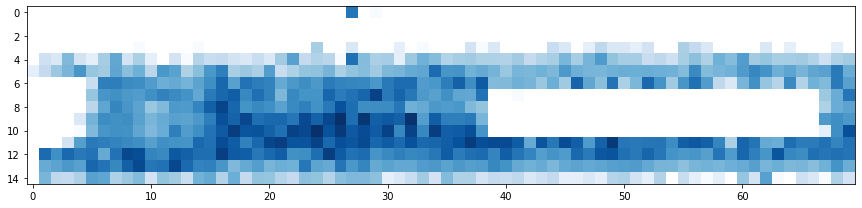

In [149]:
fig, ax = subplots(figsize=(22, 3))
ax.imshow(H,cmap = 'Blues',norm = LogNorm())
tight_layout()